Min intensity: 0
Max intensity: 2986
Min intensity masked: 0
Max intensity masked: 1


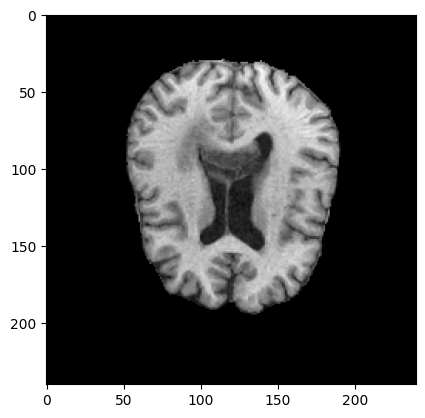

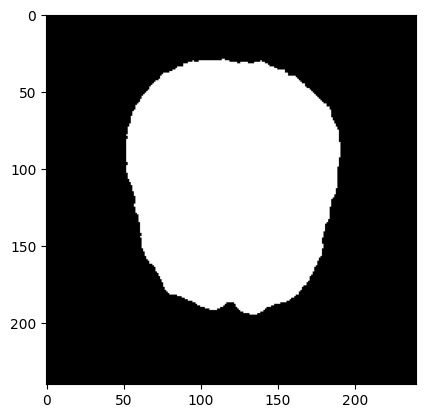

In [20]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

example_mask_dir = "/projects/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients_failed/BraTS-GLI-01332-000/REORIENTED/T1.nii.gz"
example_mask_im = sitk.ReadImage(example_mask_dir)
# Print min and max values
print("Min intensity:", sitk.GetArrayViewFromImage(example_mask_im).min())
print("Max intensity:", sitk.GetArrayViewFromImage(example_mask_im).max())
example_mask_im_masked = example_mask_im > 5
print("Min intensity masked:", sitk.GetArrayViewFromImage(example_mask_im_masked).min())
print("Max intensity masked:", sitk.GetArrayViewFromImage(example_mask_im_masked).max())
example_mask_im_masked = sitk.Cast(example_mask_im_masked, sitk.sitkUInt8)
example_mask_array = sitk.GetArrayFromImage(example_mask_im)

plt.imshow(example_mask_array[80, : , :], cmap="gray")
plt.figure()
plt.imshow(sitk.GetArrayFromImage(example_mask_im_masked)[80, :, :], cmap="gray")

Top 3 most common intensities and their counts: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


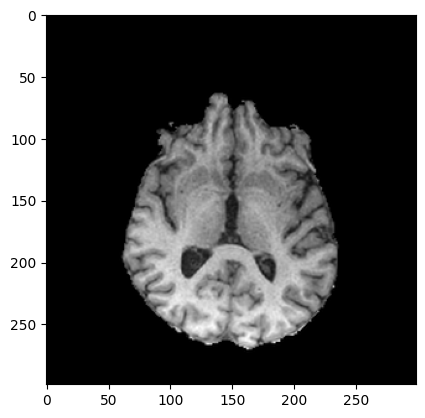

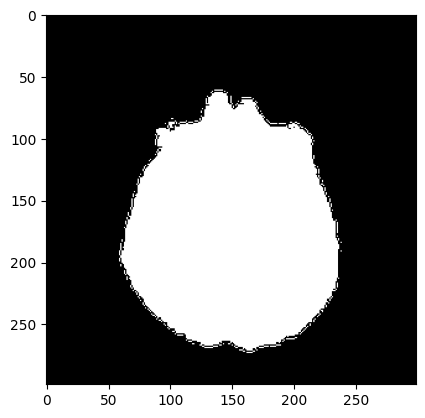

In [91]:
from scipy.stats import mode
import numpy as np
from collections import Counter

example_mask_dir = "/projects/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients/BraTS-GLI-01332-000/RESAMPLED/T1.nii.gz"
example_mask_im = sitk.ReadImage(example_mask_dir)
example_mask_arr = sitk.GetArrayFromImage(example_mask_im).astype(int)

top3 = list(Counter(example_mask_arr.flatten()).most_common(10))
top3 = [int(intensity_tuple[0]) for intensity_tuple in top3]
print("Top 3 most common intensities and their counts:", top3)

# print(int(mode(example_mask_arr3, axis=None).mode))
# print(np.unique(example_mask_arr3, return_counts=True))
# example_mask_im_masked = example_mask_im > mode(example_mask_arr, axis=None).mode
# example_mask_im_masked = np.where(mask, 0 , exmaple_mask_arr)
example_mask_im_masked = 1 - ((example_mask_arr >= min(top3)) & (example_mask_arr <= max(top3)))
# print("Min intensity masked:", sitk.GetArrayViewFromImage(example_mask_im_masked).min())
# print("Max intensity masked:", sitk.GetArrayViewFromImage(example_mask_im_masked).max())
# example_mask_im_masked = sitk.Cast(example_mask_im_masked, sitk.sitkUInt8)
example_mask_im_masked = sitk.GetImageFromArray(example_mask_im_masked.astype(np.uint8))
example_mask_im_masked.CopyInformation(example_mask_im)

plt.imshow(example_mask_array[80, : , :], cmap="gray")
plt.figure()
plt.imshow(sitk.GetArrayFromImage(example_mask_im_masked)[80, :, :], cmap="gray")

# cc = sitk.ConnectedComponent(example_mask_im_masked)
# cc_relabel = sitk.RelabelComponent(cc, sortByObjectSize=True)
# cc_largest = cc_relabel == 3
# cc_largest = sitk.Cast(cc_largest, sitk.sitkUInt8)
# plt.figure()
# plt.imshow(sitk.GetArrayFromImage(cc_largest)[80, :, :], cmap="gray")


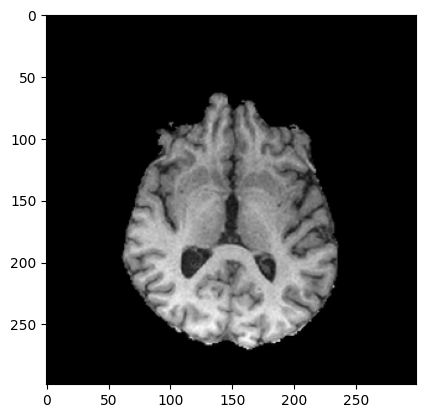

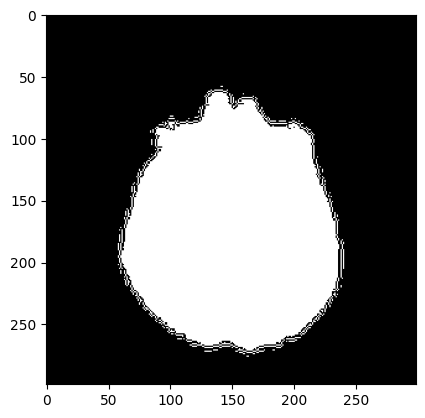

In [87]:
example_im_dir = "/projects/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients/BraTS-GLI-01332-000/RESAMPLED/T1.nii.gz"
example_im = sitk.ReadImage(example_mask_dir)
example_im_arr = sitk.GetArrayFromImage(example_im).astype(int)
example_mask_arr = example_im_arr > int(mode(example_im_arr, axis=None).mode)
example_mask_im = sitk.GetImageFromArray(example_mask_arr.astype(np.uint8))
example_mask_im.CopyInformation(example_im)

plt.imshow(example_im_arr[80, :, :], cmap="gray")
plt.figure()
plt.imshow(example_mask_arr[80, : , :], cmap="gray")

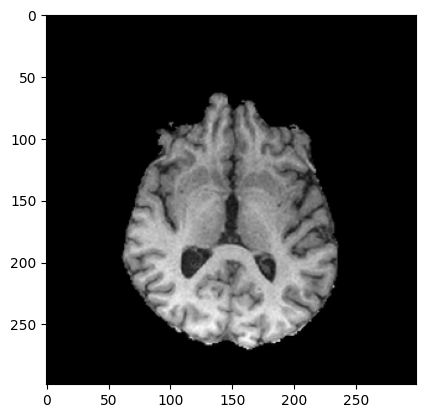

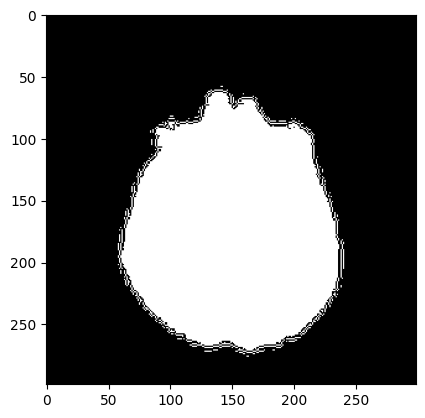

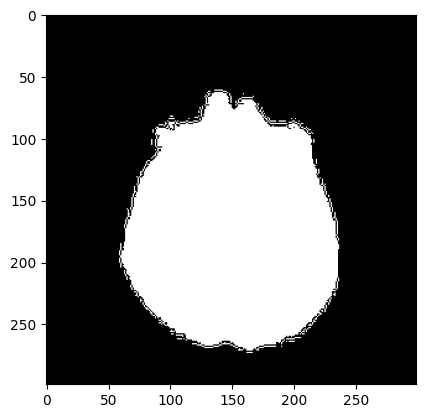

In [92]:
example_im_dir = "/projects/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients/BraTS-GLI-01332-000/RESAMPLED/T1.nii.gz"
example_im = sitk.ReadImage(example_mask_dir)
example_im_arr = sitk.GetArrayFromImage(example_im).astype(int)
example_mask_arr = example_im_arr > int(mode(example_im_arr, axis=None).mode)
example_mask_im = sitk.GetImageFromArray(example_mask_arr.astype(np.uint8))
example_mask_im.CopyInformation(example_im)

plt.imshow(example_im_arr[80, :, :], cmap="gray")
plt.figure()
plt.imshow(example_mask_arr[80, : , :], cmap="gray")

cc = sitk.ConnectedComponent(example_mask_im)
cc_relabel = sitk.RelabelComponent(cc, sortByObjectSize=True)
cc_largest = cc_relabel == 1
cc_largest = sitk.Cast(cc_largest, sitk.sitkUInt8)
plt.figure()
plt.imshow(sitk.GetArrayFromImage(cc_largest)[80, :, :], cmap="gray")

In [ ]:
from pathlib import Path
example_ims_dir = Path("/projects/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients_failed/BraTS-GLI-01332-000/RESAMPLED")

for im_path in example_ims_dir.iterdir():
    
    im = sitk.ReadImage(str(im_path))
    im_arr = sitk.GetArrayFromImage(im)
    mode_val = int(mode(im_arr, axis=None).mode)
    print(f"Image: {im_path.name} - Mode intensity: {mode_val}")

    # if mode_val > 0:
    #     im_arr = np.where(im_arr == mode_val, 0, im_arr)
    # im = sitk.GetImageFromArray(im_arr)
    # im.CopyInformation(im)
    # sitk.WriteImage(im, str(im_path))

Image: T1GD.nii.gz - Mode intensity: 0
Image: T2.nii.gz - Mode intensity: 0
Image: FLAIR.nii.gz - Mode intensity: 0
Image: T1.nii.gz - Mode intensity: 0


In [39]:
from pathlib import Path

input_dir = Path("/gpfs/work1/0/prjs0971/glioseg/data/BraTS2023_relabeled_2/Patients")

for patient_dir in input_dir.iterdir():
    reoriented_data = patient_dir / "REORIENTED"
    print(f"Processing patient: {patient_dir.name}")
    for scan in reoriented_data.iterdir():
        if scan.name.endswith(".nii.gz"): 
            scan_im = sitk.ReadImage(str(scan))
            scan_arr = sitk.GetArrayFromImage(scan_im).astype(int)
            top3 = Counter(scan_arr.flatten()).most_common(10)
            print(f"  Scan: {scan.name} - Top 3 intensities: {top3}")

Processing patient: BraTS-GLI-01297-000
  Scan: T1GD.nii.gz - Top 3 intensities: [(np.int64(0), 7681463), (np.int64(1096), 2912), (np.int64(1073), 2906), (np.int64(1100), 2881), (np.int64(1091), 2874), (np.int64(1099), 2870), (np.int64(1090), 2859), (np.int64(1059), 2855), (np.int64(1067), 2854), (np.int64(1089), 2850)]
  Scan: T2.nii.gz - Top 3 intensities: [(np.int64(0), 7681463), (np.int64(827), 3461), (np.int64(835), 3456), (np.int64(798), 3426), (np.int64(815), 3424), (np.int64(808), 3415), (np.int64(828), 3405), (np.int64(822), 3401), (np.int64(802), 3398), (np.int64(814), 3397)]
  Scan: FLAIR.nii.gz - Top 3 intensities: [(np.int64(0), 7681463), (np.int64(437), 9282), (np.int64(445), 9237), (np.int64(442), 9213), (np.int64(439), 9205), (np.int64(443), 9170), (np.int64(446), 9164), (np.int64(438), 9119), (np.int64(440), 9070), (np.int64(449), 9065)]
  Scan: T1.nii.gz - Top 3 intensities: [(np.int64(0), 7681463), (np.int64(982), 3512), (np.int64(968), 3505), (np.int64(957), 3462), 

KeyboardInterrupt: 